In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten ,Dense

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
dataset = pd.read_csv('dataset/heart.csv')

In [7]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [8]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [9]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


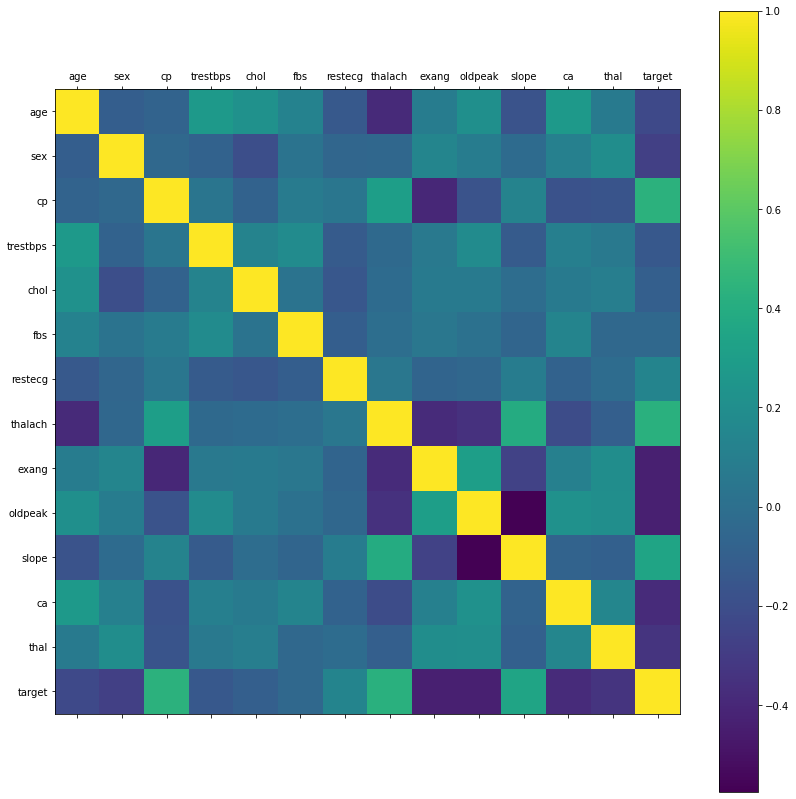

In [10]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

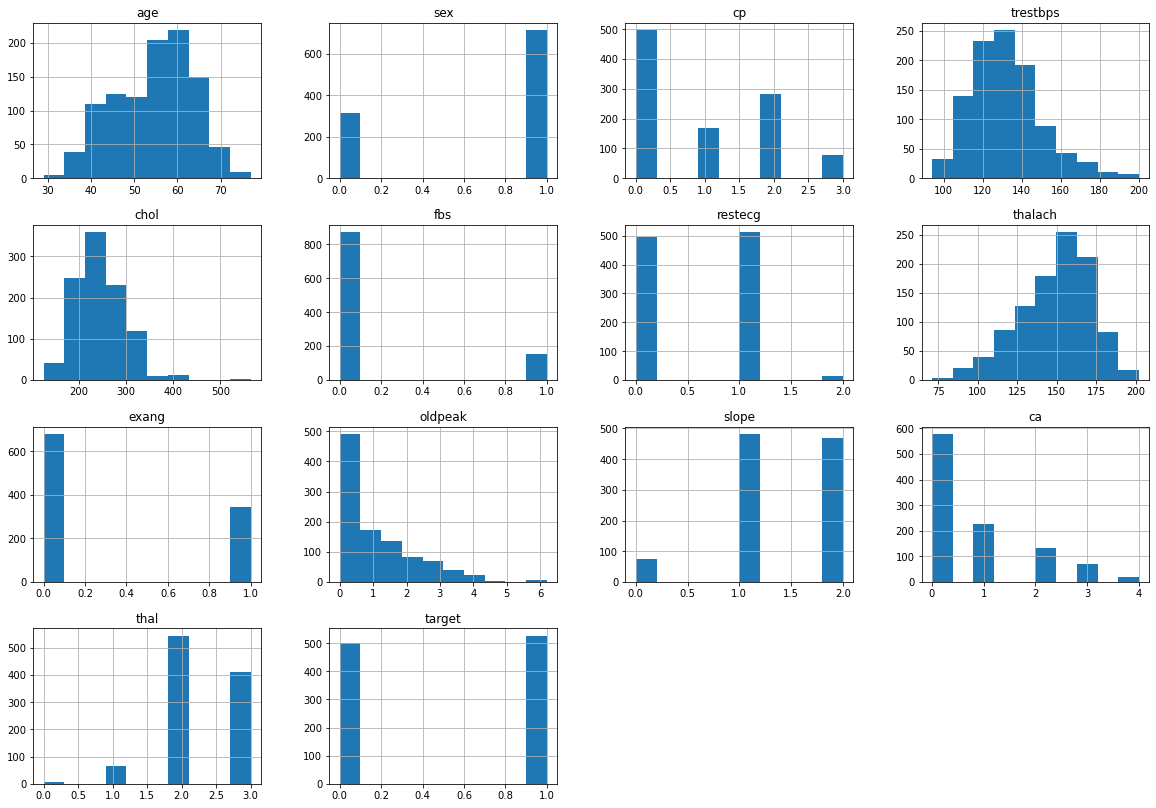

In [11]:
dataset.hist()


Text(0.5, 1.0, 'Count of each Target Class')

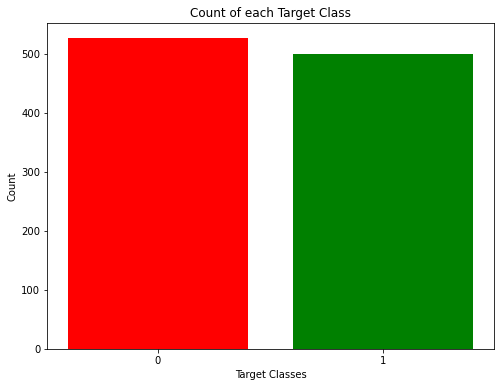

In [13]:
rcParams['figure.figsize'] = 8,6
plt.bar(dataset['target'].unique(), dataset['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

In [14]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

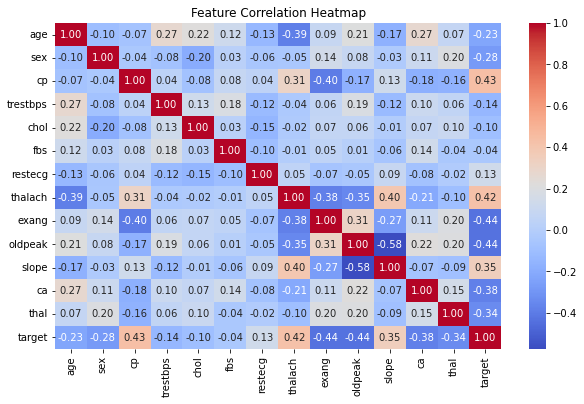

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [18]:
x = dataset.drop(columns=["target"]) 

In [19]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [20]:
y = dataset["target"] 

In [21]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
835,49,1,2,118,149,0,0,126,0,0.8,2,3,2
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2
534,54,0,2,108,267,0,0,167,0,0.0,2,0,2
495,59,1,0,135,234,0,1,161,0,0.5,1,0,3
244,51,1,2,125,245,1,0,166,0,2.4,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,41,1,2,130,214,0,0,168,0,2.0,1,0,2
71,61,1,0,140,207,0,0,138,1,1.9,2,1,3
106,51,1,0,140,299,0,1,173,1,1.6,2,0,3
270,43,1,0,110,211,0,1,161,0,0.0,2,0,3


In [26]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
527,62,0,0,124,209,0,1,163,0,0.0,2,0,2
359,53,0,2,128,216,0,0,115,0,0.0,2,0,0
447,55,1,0,160,289,0,0,145,1,0.8,1,1,3
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2
621,48,1,0,130,256,1,0,150,1,0.0,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,68,1,2,118,277,0,1,151,0,1.0,2,1,3
796,41,1,1,135,203,0,1,132,0,0.0,1,0,1
644,44,1,2,120,226,0,1,169,0,0.0,2,0,2
404,61,1,0,140,207,0,0,138,1,1.9,2,1,3


In [27]:
y_train

835    0
137    1
534    1
495    1
244    1
      ..
700    1
71     0
106    0
270    1
860    0
Name: target, Length: 820, dtype: int64

In [28]:
y_test

527    1
359    1
447    0
31     1
621    0
      ..
832    1
796    1
644    1
404    0
842    0
Name: target, Length: 205, dtype: int64

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
X_train

array([[-0.58584022,  0.65465367,  1.008275  , ...,  1.00526437,
         2.17169136, -0.54519316],
       [ 1.05147737, -1.52752523, -0.91672034, ...,  1.00526437,
        -0.7254674 , -0.54519316],
       [-0.04006769, -1.52752523,  1.008275  , ...,  1.00526437,
        -0.7254674 , -0.54519316],
       ...,
       [-0.36753121,  0.65465367, -0.91672034, ...,  1.00526437,
        -0.7254674 ,  1.11057867],
       [-1.24076726,  0.65465367, -0.91672034, ...,  1.00526437,
        -0.7254674 ,  1.11057867],
       [-0.2583767 ,  0.65465367, -0.91672034, ...,  1.00526437,
         0.24025219, -0.54519316]])

In [31]:
print(X_test)

[[ 0.83316836 -1.52752523 -0.91672034 ...  1.00526437 -0.7254674
  -0.54519316]
 [-0.1492222  -1.52752523  1.008275   ...  1.00526437 -0.7254674
  -3.85673683]
 [ 0.06908682  0.65465367 -0.91672034 ... -0.64007851  0.24025219
   1.11057867]
 ...
 [-1.13161275  0.65465367  1.008275   ...  1.00526437 -0.7254674
  -0.54519316]
 [ 0.72401385  0.65465367 -0.91672034 ...  1.00526437  0.24025219
   1.11057867]
 [ 0.39655033  0.65465367  1.008275   ... -0.64007851  0.24025219
   1.11057867]]


In [32]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

In [33]:
log_pred 

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [34]:
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

In [35]:
dt_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [36]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)


In [37]:
rf_pred 

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [38]:
svm_model = SVC(kernel="rbf", probability=True)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

In [39]:
svm_pred 

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [40]:
X_train.shape

(820, 13)

In [41]:
model = Sequential([
    Dense(16, activation="relu", input_shape=(X_train.shape[1],)),
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [42]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [43]:
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
52/52 [==============================] - 1s 4ms/step - loss: 0.5638 - accuracy: 0.7585 - val_loss: 0.5465 - val_accuracy: 0.7659
Epoch 2/100
52/52 [==============================] - 0s 2ms/step - loss: 0.4771 - accuracy: 0.8134 - val_loss: 0.4952 - val_accuracy: 0.7805
Epoch 3/100
52/52 [==============================] - 0s 2ms/step - loss: 0.4153 - accuracy: 0.8341 - val_loss: 0.4681 - val_accuracy: 0.7805
Epoch 4/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3776 - accuracy: 0.8378 - val_loss: 0.4550 - val_accuracy: 0.7707
Epoch 5/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3503 - accuracy: 0.8549 - val_loss: 0.4418 - val_accuracy: 0.8098
Epoch 6/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3317 - accuracy: 0.8671 - val_loss: 0.4341 - val_accuracy: 0.8049
Epoch 7/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3181 - accuracy: 0.8732 - val_loss: 0.4275 - val_accuracy: 0.8098
Epoch 8/100
5

Epoch 59/100
52/52 [==============================] - 0s 1ms/step - loss: 0.0638 - accuracy: 0.9878 - val_loss: 0.1694 - val_accuracy: 0.9415
Epoch 60/100
52/52 [==============================] - 0s 1ms/step - loss: 0.0617 - accuracy: 0.9890 - val_loss: 0.1655 - val_accuracy: 0.9512
Epoch 61/100
52/52 [==============================] - 0s 1ms/step - loss: 0.0597 - accuracy: 0.9902 - val_loss: 0.1651 - val_accuracy: 0.9512
Epoch 62/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0576 - accuracy: 0.9902 - val_loss: 0.1633 - val_accuracy: 0.9610
Epoch 63/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0565 - accuracy: 0.9902 - val_loss: 0.1622 - val_accuracy: 0.9610
Epoch 64/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0541 - accuracy: 0.9890 - val_loss: 0.1597 - val_accuracy: 0.9610
Epoch 65/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0520 - accuracy: 0.9915 - val_loss: 0.1560 - val_accuracy: 0.9610
Epoch 

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                224       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


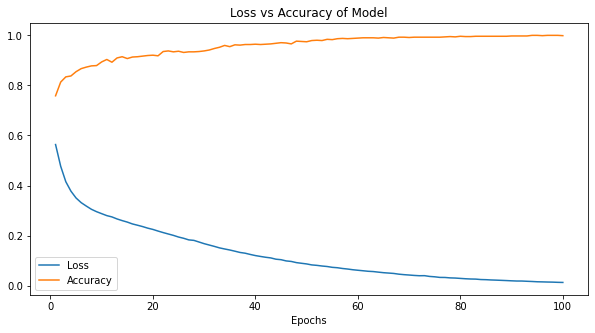

In [45]:
import matplotlib.pyplot as plt

epochs = range(1, 101) 
plt.figure(figsize=(10, 5))
plt.title("Loss vs Accuracy of Model")
plt.plot(epochs, history.history['loss'][:200], label='Loss')
plt.plot(epochs, history.history['accuracy'][:200], label='Accuracy')
plt.grid()
plt.xlabel("Epochs")
plt.grid()
plt.legend()
plt.show()

In [46]:
y_pred = (model.predict(X_test) > 0.5).astype(int) 

7/7 [==============================] - 0s 1ms/step


In [52]:
def evaluate_model(name, y_test, y_pred):
    print(f"\n{name} Model Evaluation")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Confusion Matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["No Heart Disease", "Heart Disease"], yticklabels=["No Heart Disease", "Heart Disease"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{name} Confusion Matrix")
    plt.show()


Logistic Regression Model Evaluation
Accuracy: 0.7951219512195122
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



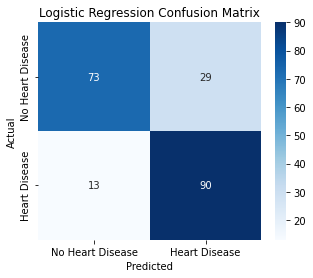

In [53]:
evaluate_model("Logistic Regression", y_test, log_pred)


Decision Tree Model Evaluation
Accuracy: 0.8439024390243902
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.74      0.82       102
           1       0.78      0.95      0.86       103

    accuracy                           0.84       205
   macro avg       0.86      0.84      0.84       205
weighted avg       0.86      0.84      0.84       205



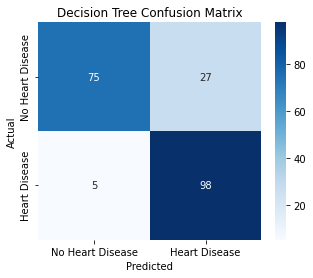

In [54]:
evaluate_model("Decision Tree", y_test, dt_pred)


Random Forest Model Evaluation
Accuracy: 0.9853658536585366
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



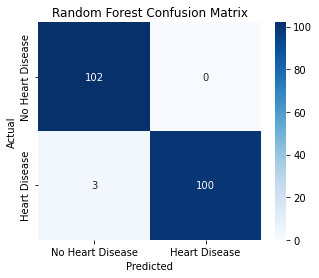

In [55]:
evaluate_model("Random Forest", y_test, rf_pred)


SVM Model Evaluation
Accuracy: 0.8878048780487805
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.83      0.88       102
           1       0.85      0.94      0.89       103

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205



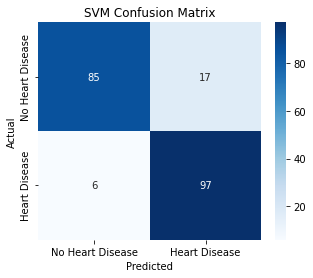

In [56]:
evaluate_model("SVM", y_test, svm_pred)


Neural Network Model Evaluation
Accuracy: 0.9853658536585366
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



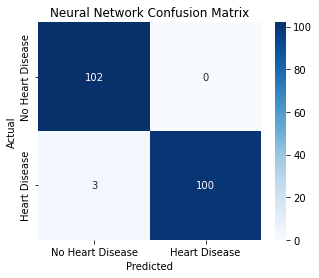

In [57]:
evaluate_model("Neural Network", y_test, y_pred)

In [58]:
def predict_Heart_Disease(model, scaler, user_input):
    
    df = pd.DataFrame([user_input])
    df_scaled = scaler.transform(df) 
    prediction = model.predict(df_scaled)[0] if not isinstance(model, Sequential) else (model.predict(df_scaled)[0][0] > 0.5).astype(int)
    return "Heart Disease Detected" if prediction == 1 else "No Heart Disease"

In [59]:
new_patient_healthy = {
    "age": 30, "sex": 0, "cp": 0, "trestbps": 120, "chol": 180, "fbs": 0, "restecg": 0,
    "thalach": 170, "exang": 0, "oldpeak": 0.0, "slope": 2, "ca": 0, "thal": 2
}

In [60]:
predict_Heart_Disease(model,scaler,new_patient_healthy )

1/1 [==============================] - 0s 26ms/step


'Heart Disease Detected'

In [63]:
new_patient = {
    "age": 25, "sex": 0, "cp": 0, "trestbps": 110, "chol": 160, "fbs": 0, "restecg": 0,
    "thalach": 180, "exang": 0, "oldpeak": 0.0, "slope": 2, "ca": 0, "thal": 2
}

In [64]:
predict_Heart_Disease(model,scaler,new_patient  )

1/1 [==============================] - 0s 30ms/step


'Heart Disease Detected'

In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import joblib
import json

# Load dataset (replace with your actual data path)
data = pd.read_csv('dataset/heart.csv')

# Define column mappings based on your feature structure
# Assuming original columns: age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target
df = pd.DataFrame({
    'age': data['age'],
    'trestbps': data['trestbps'],
    'chol': data['chol'],
    'thalach': data['thalach'],
    'oldpeak': data['oldpeak'],
    'sex': data['sex'],
    'cp': data['cp'],
    'fbs': data['fbs'],
    'restecg': data['restecg'],
    'exang': data['exang'],
    'slope': data['slope'],
    'ca': data['ca'],
    'thal': data['thal'],
    'target': data['target']
})

# Preprocessing
# Handle categorical features (one-hot encode)
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

# Ensure all expected columns are present
expected_columns = [
    'age', 'trestbps', 'chol', 'thalach', 'oldpeak',
    'sex_0', 'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3',
    'fbs_0', 'fbs_1', 'restecg_0', 'restecg_1', 'restecg_2',
    'exang_0', 'exang_1', 'slope_0', 'slope_1', 'slope_2',
    'ca_0.0', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'ca_4.0',
    'thal_0.0', 'thal_1.0', 'thal_2.0', 'thal_3.0'
]

# Add missing columns with 0 values
for col in expected_columns:
    if col not in df.columns:
        df[col] = 0

# Reorder columns to match expected structure
df = df[expected_columns + ['target']]

# Split data
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Save scaler parameters for JavaScript
scaler_params = {
    'mean': scaler.mean_.tolist(),
    'std': np.sqrt(scaler.var_).tolist()
}
with open('scaler_params.json', 'w') as f:
    json.dump(scaler_params, f)

# Save feature columns order
with open('feature_columns.json', 'w') as f:
    json.dump(expected_columns, f)

# Build model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC()]
)

# Train model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    class_weight={0: 0.5, 1: 2.0},  # Adjust for class imbalance
    verbose=2
)

# Evaluate
loss, accuracy, auc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy:.2f}")
print(f"AUC: {auc:.2f}")

# Save model
model.save('heart_disease_model.h5')

# Convert to TF.js format (run in terminal after training)
# !tensorflowjs_converter --input_format=keras heart_disease_model.h5 tfjs_model

# Example prediction
sample_input = X_test.iloc[0:1]
prediction = model.predict(sample_input)
print(f"\nSample Prediction: {prediction[0][0]:.4f}")

Epoch 1/100
26/26 - 1s - loss: 0.6901 - accuracy: 0.5207 - auc: 0.5965 - val_loss: 0.7498 - val_accuracy: 0.5024 - val_auc: 0.7887 - 1s/epoch - 44ms/step
Epoch 2/100
26/26 - 0s - loss: 0.5111 - accuracy: 0.5366 - auc: 0.8030 - val_loss: 0.7141 - val_accuracy: 0.6146 - val_auc: 0.8269 - 64ms/epoch - 2ms/step
Epoch 3/100
26/26 - 0s - loss: 0.4653 - accuracy: 0.6268 - auc: 0.8359 - val_loss: 0.6513 - val_accuracy: 0.7073 - val_auc: 0.8380 - 66ms/epoch - 3ms/step
Epoch 4/100
26/26 - 0s - loss: 0.4354 - accuracy: 0.7122 - auc: 0.8522 - val_loss: 0.6118 - val_accuracy: 0.7561 - val_auc: 0.8556 - 68ms/epoch - 3ms/step
Epoch 5/100
26/26 - 0s - loss: 0.4088 - accuracy: 0.7476 - auc: 0.8727 - val_loss: 0.6365 - val_accuracy: 0.7463 - val_auc: 0.8669 - 69ms/epoch - 3ms/step
Epoch 6/100
26/26 - 0s - loss: 0.3935 - accuracy: 0.7500 - auc: 0.8777 - val_loss: 0.5969 - val_accuracy: 0.7756 - val_auc: 0.8710 - 66ms/epoch - 3ms/step
Epoch 7/100
26/26 - 0s - loss: 0.3777 - accuracy: 0.7573 - auc: 0.8910 

Epoch 54/100
26/26 - 0s - loss: 0.1687 - accuracy: 0.9146 - auc: 0.9768 - val_loss: 0.3896 - val_accuracy: 0.8439 - val_auc: 0.9537 - 73ms/epoch - 3ms/step
Epoch 55/100
26/26 - 0s - loss: 0.1854 - accuracy: 0.8976 - auc: 0.9735 - val_loss: 0.4318 - val_accuracy: 0.8341 - val_auc: 0.9579 - 69ms/epoch - 3ms/step
Epoch 56/100
26/26 - 0s - loss: 0.1855 - accuracy: 0.8878 - auc: 0.9723 - val_loss: 0.3776 - val_accuracy: 0.8244 - val_auc: 0.9569 - 67ms/epoch - 3ms/step
Epoch 57/100
26/26 - 0s - loss: 0.1851 - accuracy: 0.9049 - auc: 0.9747 - val_loss: 0.4004 - val_accuracy: 0.8341 - val_auc: 0.9602 - 69ms/epoch - 3ms/step
Epoch 58/100
26/26 - 0s - loss: 0.1806 - accuracy: 0.8817 - auc: 0.9757 - val_loss: 0.3812 - val_accuracy: 0.8390 - val_auc: 0.9594 - 70ms/epoch - 3ms/step
Epoch 59/100
26/26 - 0s - loss: 0.1759 - accuracy: 0.9012 - auc: 0.9744 - val_loss: 0.3944 - val_accuracy: 0.8341 - val_auc: 0.9569 - 72ms/epoch - 3ms/step
Epoch 60/100
26/26 - 0s - loss: 0.1949 - accuracy: 0.8902 - auc:

In [75]:
def predict_heart_disease1(model, scaler, feature_columns, user_input):
    df = pd.DataFrame([user_input])
    df = pd.get_dummies(df)
    df = df.reindex(columns=expected_columns, fill_value=0)  # Ensure same column order
    df[numerical_cols] = scaler.transform(df[numerical_cols])
    
    prediction = model.predict(df)[0][0]
    
    print(f"Raw Model Output: {prediction}")
    
    return "No Heart Disease Detected" if prediction > 0.5 else "Heart Disease Detected"


In [76]:
predict_heart_disease1(model,scaler,expected_columns,new_patient_healthy)

1/1 [==============================] - 0s 17ms/step
Raw Model Output: 0.9998903870582581


'No Heart Disease Detected'

In [77]:
new_patient_disease = {
    "age": 65, "sex": 1, "cp": 3, "trestbps": 140, "chol": 300, "fbs": 1, "restecg": 2,
    "thalach": 120, "exang": 1, "oldpeak": 2.5, "slope": 1, "ca": 2, "thal": 3
}

In [78]:
predict_heart_disease1(model,scaler,expected_columns,new_patient_disease)

1/1 [==============================] - 0s 43ms/step
Raw Model Output: 0.00042669728281907737


'Heart Disease Detected'

In [79]:
X_train.shape[1]

30